In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.display import Image
import pydotplus

In [2]:
df = pd.read_csv('./diabetes_data_upload.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
df.columns = ['Age', 'Gender',	'Polyuria',	'Polydipsia',	'sudden',	'weakness',	'Polyphagia',	'Genital',	'visual',	'Itching', 'Irritability',	'delayed',	'partial',	'muscle',	'Alopecia',	'Obesity',	'class']

In [4]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden,weakness,Polyphagia,Genital,visual,Itching,Irritability,delayed,partial,muscle,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
col_a_num = ['Gender', 'Polyuria',	'Polydipsia',	'sudden',	'weakness',	'Polyphagia',	'Genital', 'visual', 'Itching', 'Irritability',	'delayed', 'partial',	'muscle',	'Alopecia',	'Obesity', 'class']

In [6]:
label_encoders = {} # aqui se almacena el objeto LabelEncoder, que permitirá convertir las categorías originales de vuelta a números si es necesario.
for col in col_a_num:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [7]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden,weakness,Polyphagia,Genital,visual,Itching,Irritability,delayed,partial,muscle,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [8]:
label_encoders

{'Gender': LabelEncoder(),
 'Polyuria': LabelEncoder(),
 'Polydipsia': LabelEncoder(),
 'sudden': LabelEncoder(),
 'weakness': LabelEncoder(),
 'Polyphagia': LabelEncoder(),
 'Genital': LabelEncoder(),
 'visual': LabelEncoder(),
 'Itching': LabelEncoder(),
 'Irritability': LabelEncoder(),
 'delayed': LabelEncoder(),
 'partial': LabelEncoder(),
 'muscle': LabelEncoder(),
 'Alopecia': LabelEncoder(),
 'Obesity': LabelEncoder(),
 'class': LabelEncoder()}

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Age           520 non-null    int64
 1   Gender        520 non-null    int32
 2   Polyuria      520 non-null    int32
 3   Polydipsia    520 non-null    int32
 4   sudden        520 non-null    int32
 5   weakness      520 non-null    int32
 6   Polyphagia    520 non-null    int32
 7   Genital       520 non-null    int32
 8   visual        520 non-null    int32
 9   Itching       520 non-null    int32
 10  Irritability  520 non-null    int32
 11  delayed       520 non-null    int32
 12  partial       520 non-null    int32
 13  muscle        520 non-null    int32
 14  Alopecia      520 non-null    int32
 15  Obesity       520 non-null    int32
 16  class         520 non-null    int32
dtypes: int32(16), int64(1)
memory usage: 36.7 KB


In [10]:
df['Age'].describe()

count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: Age, dtype: float64

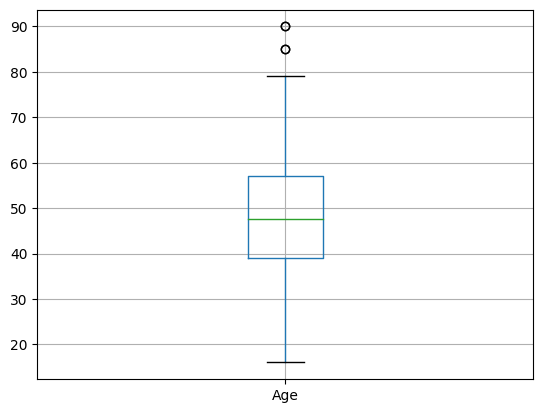

In [11]:
df.boxplot(column=['Age'])
plt.show()

In [12]:
x = df.drop(['class'],axis=1).values
y = df['class'].values

In [13]:
x.shape

(520, 16)

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [15]:
params = {'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
arbol = DecisionTreeClassifier(criterion='entropy',random_state=0)
model = GridSearchCV(arbol,params,cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 8}

In [16]:
arbol = DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=0)
arbol.fit(x_train,y_train)
y_pred = arbol.predict(x_test)

In [17]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[46,  0],
       [ 3, 81]], dtype=int64)

In [18]:
print(accuracy_score(y_test,y_pred))

0.9769230769230769


In [19]:
print(y_pred)
print(y_test)

[0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1
 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0
 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0]
[0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1
 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0
 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0]


In [20]:
export_graphviz(arbol,out_file='tree_social.dot')

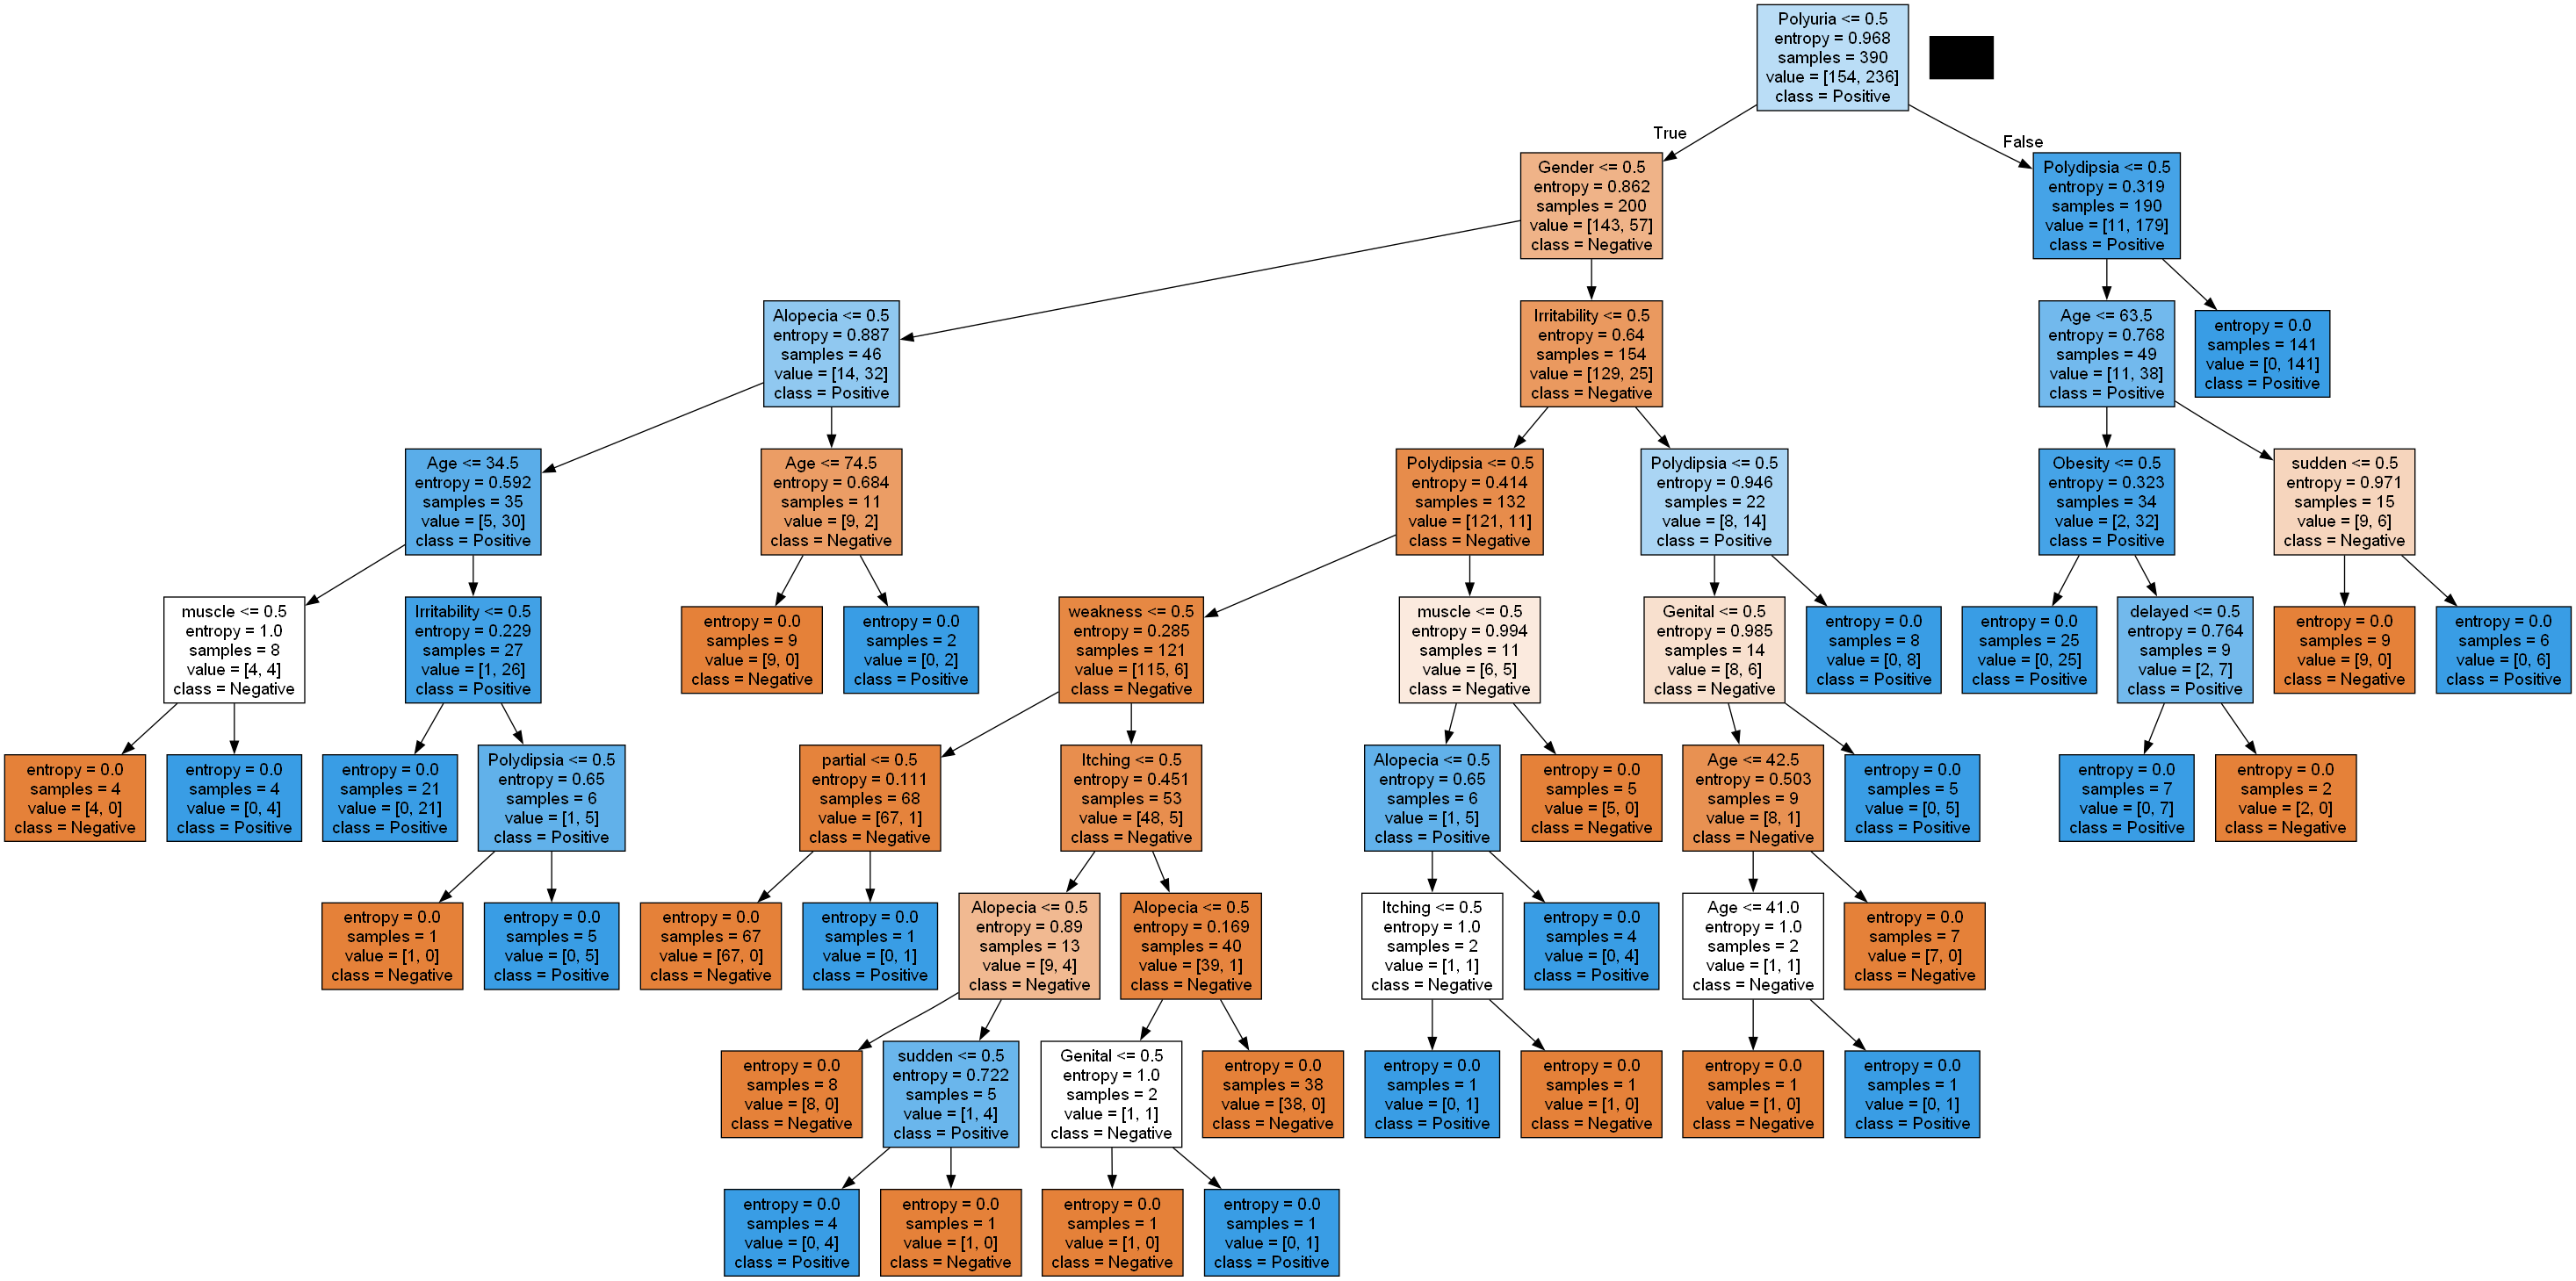

In [22]:
dot_data = export_graphviz(arbol,
                           out_file=None,
                           class_names=['Negative','Positive'],
                           feature_names=list(df.drop(['class'],axis=1)),
                           filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())